In [1]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [11]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pycountry

ModuleNotFoundError: No module named 'wordcloud'

## Sentiment Anyalsis 

In [3]:
df = pd.read_csv('test1.csv')

df['tweet']


0     @DrEricDing Ukraine &amp; US cut off COVID vac...
1     @jordanbpeterson All first world countries hav...
2     @XiBrandon10 @winechick4 @CarlosGSmith @Jeffre...
3     Court Denies Biden Administration Attempt to I...
4     So that vaccine that wasn’t needed for kids as...
5     As Ontario scraps vaccine passports, where are...
6     @Gusjackson881 @Leftylockdowns1 @duff_armstron...
7     Pfizer’s COVID-19 Vaccine Goes Into Liver Cell...
8     @boglet12 @CityBureaucrat Scott said something...
9     #Moderna COVID-19 vaccine found to offer an in...
10    @MistyLorenzo1 @wh93142779 @AreOhEssEyeEe Huma...
11    @Ajcool2020 @America89014722 @thehill The QAno...
12    The Daily podcast titled, "Ukraine, Men Who Mu...
13    Court Denies Biden Administration Attempt to I...
14    If this is correct - uhhhh....  Pfizer’s COVID...
15    Now that the Covid and vaccine propaganda has ...
16    Pfizer’s COVID-19 Vaccine Goes Into Liver Cell...
17    Dynasts dented country's self-confidence b

In [21]:
tweets = df['Cleaned Tweet']
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 print(tweet)
 tweet_list.append(tweet)
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
if neg > pos:
 negative_list.append(tweet)
 negative += 1
elif pos > neg:
 positive_list.append(tweet)
 positive += 1
 
elif pos == neg:
 neutral_list.append(tweet)
 neutral += 1
# positive = (positive/len(df['tweet']))*100
# negative = (negative/len(df['tweet']))*100
# neutral = (neutral/len(df['tweet']))*100
# polarity = (polarity/len(df['tweet']))*100
# positive = format(positive, '.1f')
# negative = format(negative, '.1f')
# neutral = format(neutral, '.1f')


I'm sorry but we do not need to have world war III a nuclear war with a country that has hypersonic missiles with the great Satan warheads that can destroy an area of the size of Texas for Joe biden's need to try to seem tough and competent. In my opinion that ship has sailed.  
Ooooo van münüt Biden’cim sende burdamıydın 😬  
I feel like I know better by now than to be excited (um hello, I bought a bunch of URLs back when I assumed Gaetz would resign by the end of the week. A year ago. But I’ve got to imagine that it’s possible that we’re about to see a twofer for Biden. And us.
  🤡
 Stolen elections have consequences. Turnip brain Biden 👇🏻  
Sanchez y Biden se saludan en la reunion del Consejo Europeo - Mundo   
In messages to Chief of Staff Mark Meadows in the weeks after Election Day, the wife of Justice Clarence Thomas called Biden’s victory “the greatest Heist of our History” and told him that President Donald Trump should not concede. GinniIsInsurrectionQB   
 Nonsense. Utter rub

## Pie Chart

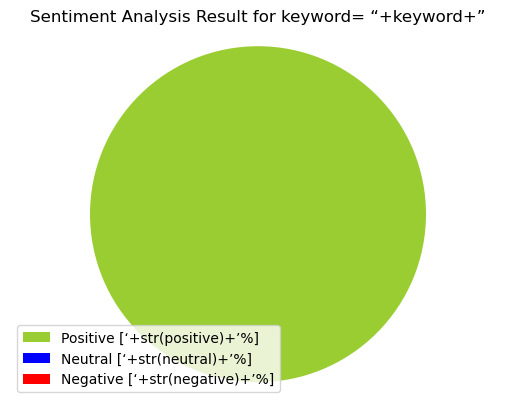

In [22]:
labels = ['Positive [‘+str(positive)+’%]' , 'Neutral [‘+str(neutral)+’%]','Negative [‘+str(negative)+’%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= “+keyword+”' )
plt.axis('equal')
plt.show()


In [19]:
print(positive)

0.0


In [23]:
print(neutral_list)

['@wstrickRTR @EdFiedler2 @artkitchen76 Oh, please?!  Ron DeathSantis is a wannabe autocrat.  Wonder how much $$ he\'s paying that "physician" in FL to lie to Floridians RE Covid &amp; all vaccines.']


In [28]:
tweets[1].strip().encode('ascii','ignore')

b"@jordanbpeterson All first world countries have mandated covid vaccines and masks to some extent in order to protect their citizens. ALL OF THEM. It's temporary and nothing to cry about."

In [29]:
tweets[1]

"@jordanbpeterson All first world countries have mandated covid vaccines and masks to some extent in order to protect their citizens. ALL OF THEM. It's temporary and nothing to cry about."

In [36]:
##cleaning up tweet
text = tweets[1]
text = re.sub(r'@[A-Za-z0-9]+', '', text)
text = re.sub(r'#', '', text)
text = re.sub(r'RT[\s]+','', text)
text = re.sub(r'https?:\/\/\S+', '', text)


In [38]:
TextBlob(text).sentiment.subjectivity

0.3333333333333333

In [39]:
TextBlob(text).sentiment.polarity

0.25

In [24]:
df = pd.read_csv('trump.csv')
tweets = list(df['tweet'])
cleaned_tweets = []
subjectivity = []
polarity = []

for tweet in tweets:
    text = ""
    text = tweet
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    cleaned_tweets.append(text)
    subjectivity.append(TextBlob(text).sentiment.subjectivity)
    polarity.append(TextBlob(text).sentiment.subjectivity)
df['Cleaned Tweet'] = cleaned_tweets
df['Subjectivity'] = subjectivity
df['Polarity'] = polarity


In [25]:
def getAnlaysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Postive'

df['Analysis'] = df['Polarity'].apply(getAnlaysis)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Cleaned Tweet,Subjectivity,Polarity,Analysis
0,1507145232634290188,1507145232634290188,2022-03-24 18:59:59 CDT,2022-03-24,18:59:59,-500,1604656346,rey_lowe,Rey LoweIffert,NaN,...,NaN,[],NaN,NaN,NaN,NaN,I'm sorry but we do not need to have world war...,0.650000,0.650000,Postive
1,1507145230860144640,1507145230860144640,2022-03-24 18:59:59 CDT,2022-03-24,18:59:59,-500,1051805619320180736,asriairsa,AsKon ,NaN,...,NaN,[],NaN,NaN,NaN,NaN,Ooooo van münüt Biden’cim sende burdamıydın 😬,0.000000,0.000000,Neutral
2,1507145228775473162,1507145228775473162,2022-03-24 18:59:58 CDT,2022-03-24,18:59:58,-500,205205128,kathrynisms,Kathryn Elizabeth 💙💛🌻,NaN,...,NaN,[],NaN,NaN,NaN,NaN,I feel like I know better by now than to be ex...,0.562500,0.562500,Postive
3,1507145225034252305,1507001804437000200,2022-03-24 18:59:57 CDT,2022-03-24,18:59:57,-500,1275530056501207042,granolagirl1969,LetThereBeLight💫✨🍊,NaN,...,NaN,"[{'screen_name': 'SenWarren', 'name': 'Elizabe...",NaN,NaN,NaN,NaN,🤡,0.000000,0.000000,Neutral
4,1507145221980979201,1507130171723325456,2022-03-24 18:59:56 CDT,2022-03-24,18:59:56,-500,1348674830464409601,ozzmark4,mark ozz 🇺🇸 👋,NaN,...,NaN,"[{'screen_name': 'WEAU13News', 'name': 'WEAU 1...",NaN,NaN,NaN,NaN,Stolen elections have consequences. Turnip br...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1507144024649617408,1507115271709933581,2022-03-24 18:55:11 CDT,2022-03-24,18:55:11,-500,1042750850203103232,jeanjacquesdes7,Jean Jacques Dessalines,NaN,...,NaN,"[{'screen_name': 'POTUS', 'name': 'President B...",NaN,NaN,NaN,NaN,A bunch of white frats sticking together for ...,0.300000,0.300000,Postive
1012,1507144023873568775,1507144023873568775,2022-03-24 18:55:11 CDT,2022-03-24,18:55:11,-500,1340093943879512065,blackknight10k,I Smoked Will Smith's Oscar,NaN,...,NaN,[],NaN,NaN,NaN,NaN,Clarence Thomas should be in front of Congress...,0.000000,0.000000,Neutral
1013,1507144022975995915,1507144022975995915,2022-03-24 18:55:11 CDT,2022-03-24,18:55:11,-500,983521594776616960,b_buxler,Becky Buxler,NaN,...,NaN,[],NaN,NaN,NaN,NaN,Bill O'Reilly: There is a chance that Hunter B...,0.000000,0.000000,Neutral
1014,1507144020644007937,1507144020644007937,2022-03-24 18:55:10 CDT,2022-03-24,18:55:10,-500,970842271,yvonnekirlew,Yvonne K.,NaN,...,NaN,[],NaN,NaN,NaN,NaN,PRESIDENT JOE BIDEN---DAY428---SECOND YEAR DAY...,0.000000,0.000000,Neutral


In [27]:
#Printing all of the postive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Postive'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

1) I'm sorry but we do not need to have world war III a nuclear war with a country that has hypersonic missiles with the great Satan warheads that can destroy an area of the size of Texas for Joe biden's need to try to seem tough and competent. In my opinion that ship has sailed.  

2) I feel like I know better by now than to be excited (um hello, I bought a bunch of URLs back when I assumed Gaetz would resign by the end of the week. A year ago. But I’ve got to imagine that it’s possible that we’re about to see a twofer for Biden. And us.

3) In messages to Chief of Staff Mark Meadows in the weeks after Election Day, the wife of Justice Clarence Thomas called Biden’s victory “the greatest Heist of our History” and told him that President Donald Trump should not concede. GinniIsInsurrectionQB   

4)  Nonsense. Utter rubbish. All such theatre.

5)  There are more illegals that come through the border each month than what you are taking from Ukraine….you only care about Ukraine when your 

In [28]:
#Printing all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if ( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

## Testing Out VADER

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [30]:
df = pd.read_csv('trump.csv')
tweets = list(df['tweet'])
cleaned_tweets = []
scores = []
compounds = []

for tweet in tweets:
    text = ""
    text = tweet
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    cleaned_tweets.append(text)
    score = sid.polarity_scores(text)
    scores.append(score)
    compound = score['compound']
    compounds.append(compound)
df['Cleaned Tweet'] = cleaned_tweets
df['scores'] = scores
df['compound'] = compounds


In [31]:
def getAnlaysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Postive'

df['Analysis'] = df['compound'].apply(getAnlaysis)


In [39]:
#Printing all of the postive tweets
j=1
sortedDF = df.sort_values(by=['compound'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Postive'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

1)  It is not the first time Trump has committed treason and thanks to the US Senate and the Dept of ‘Justice’ it probably won’t be the last.

2) .  running for re-election in OH01 (Biden+8)  running in OH13 (Biden+3)  &amp; _riedel  running in OH09 (Trump+3, down from Biden+19 for Kaptur)   More importantly,  &amp;  shored up 😁

3)   Trump only cares about what you and others can do for him! Trump knows how to use your anger and fears to his benefit! He will disappoint his supporters in the end, and watch him blame his supporters for it! It’s all a act for your foolish loyalty!

4) NEW: On January 6, Trump, himself, called Republican Senator Mike Lee using a number recorded as "202-395-0000," which corresponds to an official White House phone.   

5) Oh, god. Not trump. I don’t want him back at the white house.

6) BIDEN DOESN'T GIVE A RATS ASS ABOUT YOUR SITUATION CALL PRESIDENT TRUMP  

7)  The 1/6 committee is begging, prosecutors are begging, and Americans are begging for justice 

In [40]:
#Printing all of the negative tweets
j=1
sortedDF = df.sort_values(by=['compound'])
for i in range(0, sortedDF.shape[0]):
    if ( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

1)   _ Exactly haha 😂 if that was his goal he sure Fucked up bigtime. Trump woke my ass out of the matrix.. I was like all the rest believing in their scams

2) _Jordan Probably as low as it was before 'Title 42' was put up. Immigration had been going down before Trump became president. Jim Jordan is such a moron and bigot. Oh and he enjoyed watching a doctor sexually molest boys.

3)  The US has just issued a warning to the Trump Crime Family and its MAGA supporters.  

4)  Putin had no trouble hooking Trump and reeling him in, because with Donnie, almost any lure works: money, teen girls, illegal election help, or even just a few words of praise.  That's all it took to get TraitorTrump to betray America.  

5) Scoop: FEC fines DNC and Clinton for Trump dossier hoax | Washington Examiner  

6) This story is getting bigger. Tampering with official records is what forced Nixon to resign. Tampering with evidence in a criminal case is another issue altogether... assuming there actually is